In [39]:
#import all required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the CSV data into a DataFrame
df = df = pd.read_csv('U.S. Presidents Birth and Death Information - Sheet1.csv')

In [7]:
#drop rows that don't have BIRTH DATE
df = df.dropna(subset=['BIRTH DATE'])

todays_date = pd.Timestamp.now().date()

#convert birth & death date columsn to datetime
df['BIRTH DATE'] = pd.to_datetime(df['BIRTH DATE'])
df['DEATH DATE'] = pd.to_datetime(df['DEATH DATE'])

#fill in missing values
df['DEATH DATE'].fillna(todays_date)

print(df.dtypes)

PRESIDENT                    object
BIRTH DATE           datetime64[ns]
BIRTH PLACE                  object
DEATH DATE           datetime64[ns]
LOCATION OF DEATH            object
dtype: object


In [16]:
#Addition of new features to the data

df['year_of_birth'] = df['BIRTH DATE'].dt.year
df['lived_years'] = df['DEATH DATE'].dt.year - df['BIRTH DATE'].dt.year
df['lived_months'] = round(((df['DEATH DATE'] - df['BIRTH DATE'])/np.timedelta64(1, 'M')), 2)
df['lived_days'] = (df['DEATH DATE'] - df['BIRTH DATE']).dt.days
df

,PRESIDENT,BIRTH DATE,BIRTH PLACE,DEATH DATE,LOCATION OF DEATH,year_of_birth,lived_years,lived_months,lived_days
0,George Washington,1732-02-22,"Westmoreland Co., Va.",1799-12-14,"Mount Vernon, Va.",1732,67,813.72,24767
1,John Adams,1735-10-30,"Quincy, Mass.",1826-07-04,"Quincy, Mass.",1735,91,1088.12,33119
2,Thomas Jefferson,1743-04-13,"Albemarle Co., Va.",1826-07-04,"Albemarle Co., Va.",1743,83,998.69,30397
3,James Madison,1751-03-16,"Port Conway, Va.",1836-06-28,"Orange Co., Va.",1751,85,1023.43,31150
4,James Monroe,1758-04-28,"Westmoreland Co., Va.",1831-07-04,"New York, New York",1758,73,878.18,26729
5,John Quincy Adams,1767-07-11,"Quincy, Mass.",1848-02-23,"Washington, D.C.",1767,81,967.44,29446
6,Andrew Jackson,1767-03-15,"Waxhaws, No/So Carolina",1845-06-08,"Nashville, Tennessee",1767,78,938.80,28574
7,Martin Van Buren,1782-12-05,"Kinderhook, New York",1862-07-24,"Kinderhook, New York",1782,80,955.58,29085
8,William Henry Harrison,1773-02-09,"Charles City Co., Va.",1841-04-04,"Washington, D.C.",1773,68,817.76,24890
9,John Tyler,1790-03-29,"Charles City Co., Va.",1862-01-18,"Richmond, Va.",1790,72,861.69,26227


In [58]:
#sort values based on 'lived_days' in ascending order and get first 10 rows
shortest_lived = df.sort_values(by=['lived_days'], ignore_index=True).head(10)

#rename & display only required columns
shortest_lived = shortest_lived[['PRESIDENT','year_of_birth', 'lived_years', 'lived_days']]
shortest_lived.rename(columns = {"year_of_birth" : "Birth Year",
                               "lived_years": "Age",
                               "lived_days": "Days Lived"}, inplace=True)
print("TOP 10 Presidents from shortest to longest lived")
shortest_lived

TOP 10 Presidents from shortest to longest lived


,PRESIDENT,Birth Year,Age,Days Lived
0,John F. Kennedy,1917,46,16978
1,James A. Garfield,1831,50,18202
2,James K. Polk,1795,54,19583
3,Abraham Lincoln,1809,56,20516
4,Chester Arthur,1829,57,20863
5,Warren G. Harding,1865,58,21091
6,William McKinley,1843,58,21412
7,Theodore Roosevelt,1858,61,21985
8,Calvin Coolidge,1872,61,22099
9,Barack Obama,1961,62,22637


In [59]:
#Get shortest lived presidents amongst deceased presidents

deceased_presidents = df[df['LOCATION OF DEATH'].notnull()]
shortest_lived_deceased = df.sort_values(by=['lived_days'], ignore_index=True).head(10)

#rename & display only required columns
shortest_lived_deceased = shortest_lived_deceased[['PRESIDENT','year_of_birth', 'lived_years', 'lived_days']]
shortest_lived_deceased.rename(columns = {"year_of_birth" : "Birth Year",
                               "lived_years": "Age",
                               "lived_days": "Days Lived"}, inplace=True)

print("TOP 10 Deceased Presidents from shortest to longest lived")
shortest_lived_deceased

TOP 10 Deceased Presidents from shortest to longest lived


,PRESIDENT,Birth Year,Age,Days Lived
0,John F. Kennedy,1917,46,16978
1,James A. Garfield,1831,50,18202
2,James K. Polk,1795,54,19583
3,Abraham Lincoln,1809,56,20516
4,Chester Arthur,1829,57,20863
5,Warren G. Harding,1865,58,21091
6,William McKinley,1843,58,21412
7,Theodore Roosevelt,1858,61,21985
8,Calvin Coolidge,1872,61,22099
9,Barack Obama,1961,62,22637


In [60]:
#sort values based on 'lived_days' in descending order and get first 10 rows
longest_lived = df.sort_values(by=['lived_days'], ascending=False, ignore_index=True).head(10)

#rename & display only required columns
longest_lived = longest_lived[['PRESIDENT','year_of_birth', 'lived_years', 'lived_days']]
longest_lived.rename(columns = {"year_of_birth" : "Birth Year",
                               "lived_years": "Age",
                               "lived_days": "Days Lived"}, inplace=True)
print("TOP 10 Presidents from longest to shortest lived")
longest_lived

TOP 10 Presidents from longest to shortest lived


,PRESIDENT,Birth Year,Age,Days Lived
0,Jimmy Carter,1924,99,36093
1,George Bush,1924,94,34504
2,Gerald Ford,1913,93,34133
3,Ronald Reagan,1911,93,34088
4,John Adams,1735,91,33119
5,Herbert Hoover,1874,90,32943
6,Harry S. Truman,1884,88,32373
7,James Madison,1751,85,31150
8,Thomas Jefferson,1743,83,30397
9,Richard Nixon,1913,81,29688


In [61]:
#Get longest to shortest amongst living presidents
living_presidents = df[df['LOCATION OF DEATH'].isnull()]
longest_living = living_presidents.sort_values(by=['lived_days'], ascending=False, ignore_index=True)

#rename & display only required columns
longest_living = longest_living[['PRESIDENT','year_of_birth', 'lived_years', 'lived_days']]
longest_living.rename(columns = {"year_of_birth" : "Birth Year",
                               "lived_years": "Age",
                               "lived_days": "Days Lived"}, inplace=True)

print("Longest to Shortest LIVING presidents")
longest_living

Longest to Shortest LIVING presidents


,PRESIDENT,Birth Year,Age,Days Lived
0,Jimmy Carter,1924,99,36093
1,Joe Biden,1942,81,29469
2,Donald Trump,1946,77,28167
3,George W. Bush,1946,77,28145
4,Bill Clinton,1946,77,28101
5,Barack Obama,1961,62,22637


In [62]:
#calculate metrics from the newly created dataset
mean = round(df['lived_days'].mean(),2)
weighted_avg = round((sum(df['lived_days'] * df['lived_years']) / sum(df['lived_years'])),2)
median = df['lived_days'].median()
mode = df['lived_days'].mode().iloc[0]
max_value = df['lived_days'].max()
min_value = df['lived_days'].min()
std_deviation = round(df['lived_days'].std(), 2)

metrics = pd.DataFrame({
    'Metric': ['Mean','Weighted Average', 'Median', 'Mode', 'Maximum Value', 'Minimum Value', 'Standard Deviation'], 
    'Value': [mean, weighted_avg, median, mode, max_value, min_value, std_deviation]})

metrics

,Metric,Value
0,Mean,26453.38
1,Weighted Average,27231.46
2,Median,26227.00
3,Mode,16978.00
4,Maximum Value,36093.00
5,Minimum Value,16978.00
6,Standard Deviation,4604.22


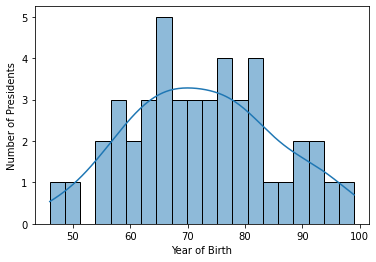

In [52]:
#Histogram with Kernal Density Estimation
sns.histplot(df['lived_years'], kde=True, bins=20)

plt.xlabel('Lived Years')
plt.ylabel('Number of Presidents')
plt.show()

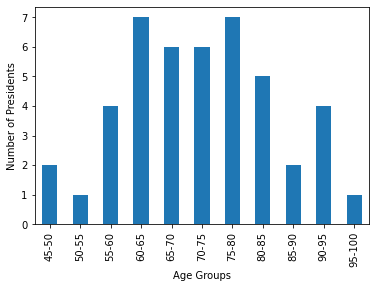

In [63]:
#plot frequency distribution of different age groups
labels=['45-50', '50-55', '55-60', '60-65', '65-70', '70-75', '75-80', '80-85', '85-90', '90-95', '95-100']
age_group= pd.cut(df['lived_years'], bins=[45,50,55,60,65,70,75,80,85,90,95,100], labels=labels)
ax = age_group.value_counts().sort_index().plot.bar()
plt.xlabel('Age Groups')
plt.ylabel('Number of Presidents')
plt.show()
